In [38]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers  import  Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [39]:
(x_train,y_train),(x_test,y_test)=load_data()

In [40]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [41]:

print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(60000,)
(10000,)


In [42]:
x_trains=x_train.astype('float32')/255.0
x_tests=x_test.astype('float32')/255.0
print(x_trains.shape)
print(x_tests.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


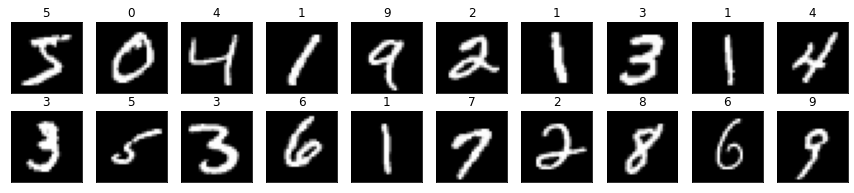

In [43]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')
    ax.set_title(y_train[i])

In [44]:
x=x_trains.shape[1:]

In [45]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="Softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 128)        

In [46]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_trains,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.3009 - accuracy: 0.9042 - val_loss: 0.0703 - val_accuracy: 0.9788
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1175 - accuracy: 0.9649 - val_loss: 0.0483 - val_accuracy: 0.9842
Epoch 3/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0906 - accuracy: 0.9733 - val_loss: 0.0434 - val_accuracy: 0.9865
Epoch 4/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0405 - val_accuracy: 0.9882
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0653 - accuracy: 0.9801 - val_loss: 0.0497 - val_accuracy: 0.9875
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 7/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0413 -

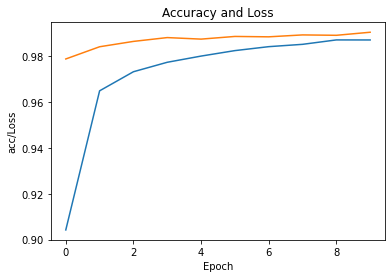

In [47]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

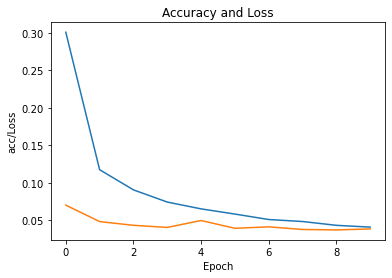

In [48]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()



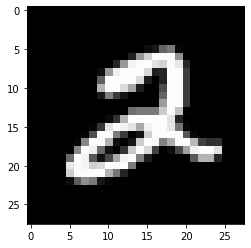

In [49]:
image=x_trains[5]
plt.imshow(np.squeeze(image),cmap="gray")

In [50]:
image=image.reshape(-1,28,28,1)
pred=model.predict([image])
np.argmax(pred)

2